
# Random Forest Project 

Lending Club connects people who need money (borrowers) with people who have money (investors). As an investor you would want to invest in people who show promise of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a very interesting year in 2016. This data is from before they even went public.

The data is lending data from 2007-2010 and I will be trying to classify and predict whether or not the borrower paid back their loan in full. 

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline 

In [2]:
loans = pd.read_csv('loan_data.csv')

In [3]:
loans.shape

(9578, 14)

In [4]:
loans['not.fully.paid'].value_counts()

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64

In [5]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [6]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [7]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# Exploratory Data Analysis


In [8]:
loans.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

Text(0.5, 0, 'FICO')

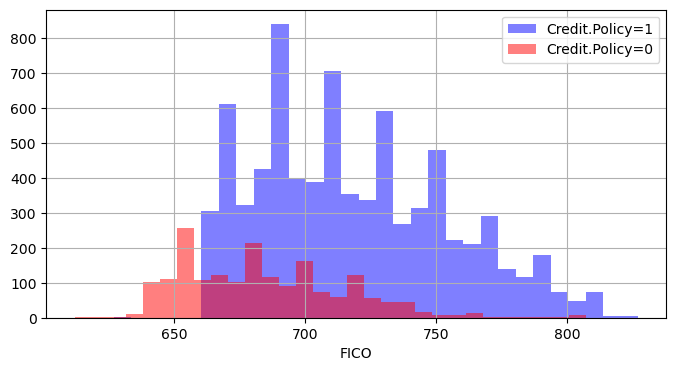

In [8]:
plt.figure(figsize=(8,4))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='Red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Insight: 

When comparing fico scores of clients that met the criteria or not we can see that those that do meet the criteria have a higher score on average than those that don't. There also seems to be a cutoff at around a 660 fico score of clients that met credit policy. 
An important note is that there is a slight positive skewness for both distributions indicating that there are more individuals with a lower fico score than those with higher scores. This could be an indicatation for a higher risk of default when lending. This is an initial insight and a look into other features could reveal more. 

Text(0.5, 0, 'FICO')

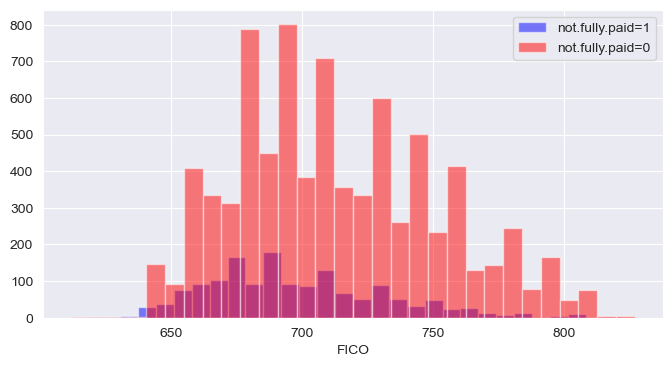

In [9]:
sns.set_style('darkgrid')

plt.figure(figsize=(8,4))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='Blue',
                                              bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='Red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

Insight:

There seems to be a similar distribution between those that have fully paid and those that have not. We can also see that there are more people that are paying off their loans. 

<Axes: xlabel='purpose', ylabel='count'>

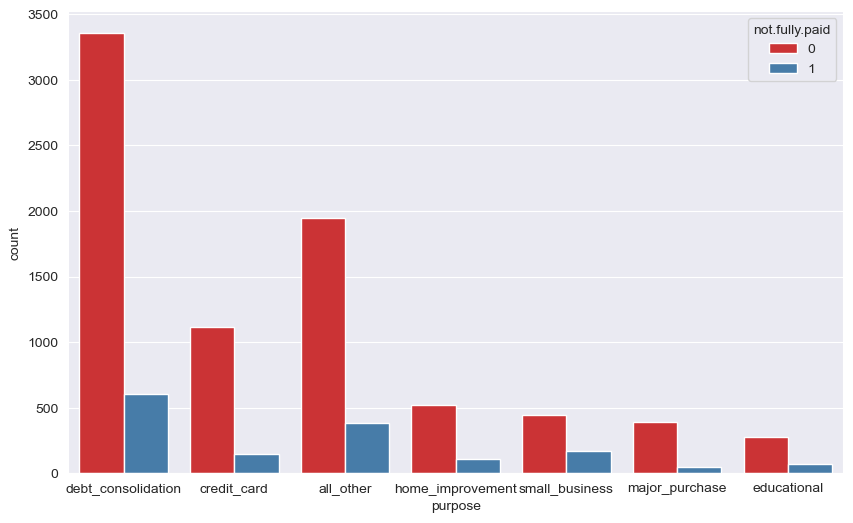

In [10]:
plt.figure(figsize = (10,6))

sns.countplot(data = loans, x = 'purpose', hue = 'not.fully.paid', palette = 'Set1')


Insight:

We can see that debt consolidation is the most popular reason for pulling out loans. Then with credit cards and all other are second and third. We can see that the ratio of fully paid and not fully paid seem are similar across all categories. 

Let's see the trend between FICO score and interest rate.

<Figure size 500x400 with 0 Axes>

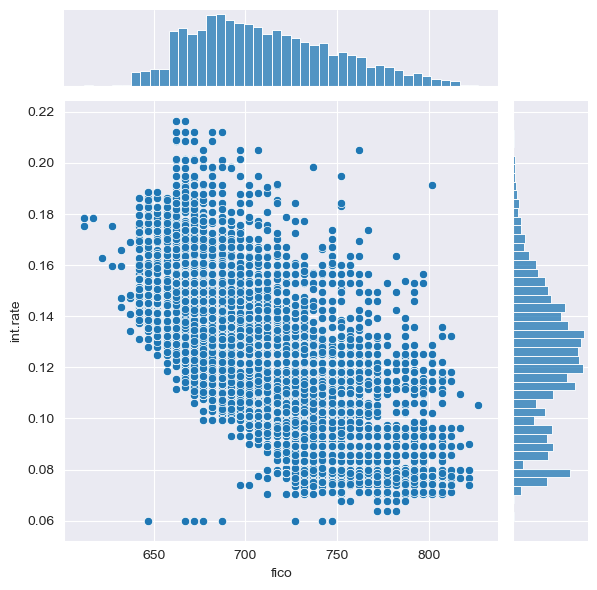

In [11]:
plt.figure(figsize = (5,4))
g = sns.JointGrid(data = loans, x = 'fico', y = 'int.rate')
g = g.plot(sns.scatterplot, sns.histplot)



Insight:

Here we see a negative trend where as fico score increases we can see that interest rate to pay off the loan decreases. This makes sense since those with lower fico scores would have a higher interest rate than those with a higher score. 

What is the trend differed between not.fully.paid and credit.policy.

C:\Users\ruben\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1100x700 with 0 Axes>

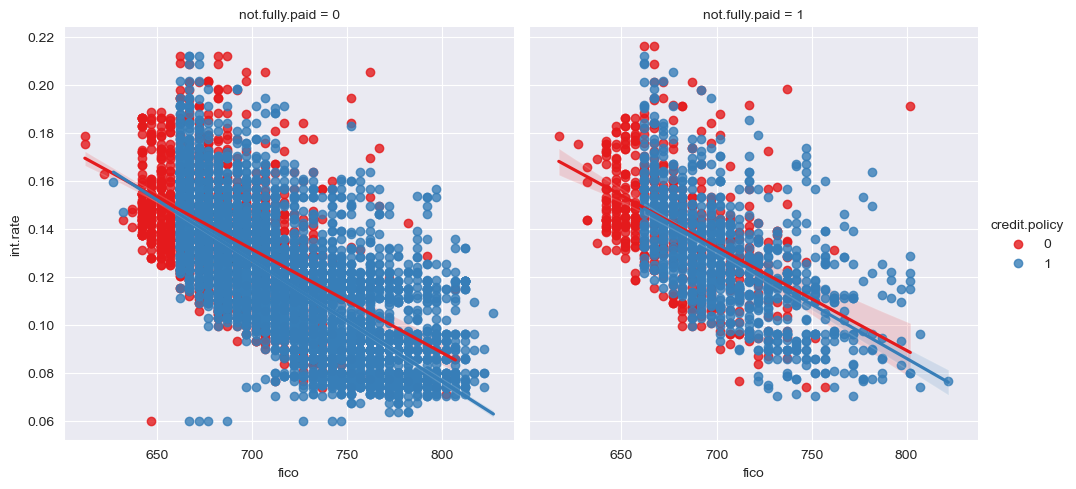

In [12]:
plt.figure(figsize = (11,7))
sns.lmplot(x = 'fico', y = 'int.rate', data = loans, hue = 'credit.policy', col = 'not.fully.paid', palette = 'Set1')


Insight: 

We can see that the trend between fully paid and not fully tends to be the same. This is also true regarding whether clients were accepted or denied the credit policy. Both visualizations show a negative trend. 

# Setting up the Data for DT and RFT

In [13]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


### Dealing w/ Categorical Features


I will need to transform the purpose feature into dummy variables so sklearn will be able to understand them.


In [14]:
cat_feats = ['purpose']

In [15]:
final_data = pd.get_dummies(loans, columns = cat_feats, drop_first = True)

In [16]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [17]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Train test data


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
loans.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [20]:
X = final_data.drop('not.fully.paid', axis = 1)

y = final_data['not.fully.paid']

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = .30, random_state = 101)

## Training a Decision Tree Model


In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
Dtree = DecisionTreeClassifier()

In [23]:
Dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree


In [24]:
y_pred = Dtree.predict(X_test)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [27]:
print(confusion_matrix(y_test,y_pred))

[[1994  437]
 [ 339  104]]


## Training the Random Forest model


In [28]:
from sklearn.ensemble import RandomForestClassifier

RFtree = RandomForestClassifier(n_estimators = 300)

In [29]:
RFtree.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

## Predictions and Evaluation for Random Forest Tree


In [30]:
rf_ypred = RFtree.predict(X_test)

In [31]:
print(classification_report(y_test, rf_ypred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.59      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.72      0.51      0.48      2874
weighted avg       0.81      0.85      0.78      2874



In [32]:
confusion_matrix(y_test,rf_ypred)

array([[2424,    7],
       [ 433,   10]], dtype=int64)

What performed better the random forest or the decision tree?

Insights: 

Both models did good at predicting class: 0, but were bad at predicting class 1. 

Determining what model performed best depends on what metric we would like to use. Overall the Random forest tree did better but if you focus on specifics like recall the Decision tree did a better job. 

Overall, neither model did very well, and more feature engineering would be needed.